In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Neural Networks with Keras

In [2]:
from numpy.random import seed
seed(1)

In [3]:
df = pd.read_csv('casino_crime.csv')
df.head()

,Id,Year,State,Countym,Industry,Suspicious Activity,Count,Lat,Long
0,0,2014,Arizona,Coconino County,Tribal Authorized Casino,Alters or Cancels Transaction to Avoid CTR Req...,1,35.829692,-111.773728
1,1,2014,Arizona,Coconino County,Tribal Authorized Casino,Exchanges Small Bills for Large Bills or Vice ...,1,35.829692,-111.773728
2,2,2014,Arizona,Coconino County,Tribal Authorized Casino,Other Structuring,1,35.829692,-111.773728
3,3,2014,Arizona,Coconino County,Tribal Authorized Casino,Provided Questionable or False Documentation,1,35.829692,-111.773728
4,4,2016,Arizona,Coconino County,Tribal Authorized Casino,Account Takeover,1,35.829692,-111.773728


In [4]:
df['Count'] = df['Count'].str.replace(',', '').astype(float).astype(int)

In [5]:
data = df[['Year','State', 'Countym','Industry', 'Suspicious Activity', 'Count']]

# data.head()

In [6]:
# data['Suspicious Activity'].unique()

In [7]:
activity = data.groupby(['Year','Suspicious Activity', 'State', 'Countym','Industry'])['Count'].sum().reset_index()
# activity.dtypes

In [8]:
activity.head()

,Year,Suspicious Activity,State,Countym,Industry,Count
0,2014,Account Takeover,Arizona,Maricopa County,Tribal Authorized Casino,11
1,2014,Account Takeover,Arizona,Pinal County,Tribal Authorized Casino,6
2,2014,Account Takeover,California,Contra Costa County,Card Club,1
3,2014,Account Takeover,California,Orange County,Tribal Authorized Casino,1
4,2014,Account Takeover,California,Placer County,Tribal Authorized Casino,8


In [9]:
# activity['Countym'].value_counts()

In [10]:
# activity['Suspicious Activity'] = activity['Suspicious Activity'].replace(
#     {'Other Other Suspicious Activities': 'Diff Suspicious Activities'})

In [11]:
# activity['Suspicious Activity'].value_counts()

In [12]:
activity = pd.get_dummies(activity, columns=['Year','State', 'Countym', 'Suspicious Activity'])
# activity.head()

# Data Pre-Processing

It is really important to scale our data before using multilayer perceptron models.

Without scaling, it is often difficult for the training cycle to converge

In [13]:
X = activity.drop(columns = ['Industry'])
y = activity['Industry'].values.reshape(-1, 1)
print(X.shape, y.shape)

(7231, 205) (7231, 1)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [16]:
# y_test

In [17]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Create a Deep Learning Model

We first need to create a sequential model.

Next, we add our first layer. This layer requires to specify both the number of inputs and the number of nodes that you want in the hidden layer. In our model we have 205 inputs (columns thats represent 'State', 'County', 'Suspicious Activity' and 'Year' which with the get_dumies function we converted in categorical data). 

Our final layer is the output layer. The output layer is mostly responsible for producing the final output results. The output layer takes the inputs which are passed in from the layers before it, and performs the calculations through its neurons and then the output is computed. Here, we need to specify the activation function (a probabilistic Activation function such as SoftMax then the output layer has one node per one class label of our model) and the number of classes (labels) that we are trying to predict (4 in this example, one for each type of Industry). 


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=1000, activation='relu', input_dim=205))
model.add(Dense(units=600, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Compile the Model

Now that we have our model architecture defined, we must compile the model using a loss function and optimizer. We can also specify additional training metrics such as accuracy. Categorical crossentropy is computed for each sample and eventually merged together – hence, the formula takes once again two inputs: prediction and target, where both are categorical.

How can predictions be categorical? They cannot be converted into categorical format from numeric format, can they?
It’s not exactly what happens. Instead of converting the data into categorical format, with categorical crossentropy we apply a categorical activation function (such as Softmax) which generates a multiclass probability distribution.

That’s a difficult term which simply tells us that it outputs a vector (hence categorical format!) containing for each class the probability that the sample belongs to the class, all probabilities together being 1 (for 100%).
Categorical crossentropy allows us to compute the loss value for multiclass classification problems – while remaining flexible with respect to the actual target class.

In [22]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              206000    
_________________________________________________________________
dense_1 (Dense)              (None, 600)               600600    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2404      
Total params: 809,004
Trainable params: 809,004
Non-trainable params: 0
_________________________________________________________________


# Training the Model

Finally, we train our model using our training data.
Training consists of updating our weights using our optimizer and loss function. In this example, we choose 100 iterations (loops) of training that are called epochs.
We also choose to shuffle our training data and increase the detail printed out during each training cycle.

In [24]:
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_data = (X_test_scaled, y_test_categorical),
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 5423 samples, validate on 1808 samples
Epoch 1/60
5423/5423 - 5s - loss: 0.4122 - acc: 0.8436 - val_loss: 0.2891 - val_acc: 0.8756
Epoch 2/60
5423/5423 - 4s - loss: 0.2600 - acc: 0.8886 - val_loss: 0.2739 - val_acc: 0.8838
Epoch 3/60
5423/5423 - 3s - loss: 0.2253 - acc: 0.8925 - val_loss: 0.2822 - val_acc: 0.8689
Epoch 4/60
5423/5423 - 3s - loss: 0.2046 - acc: 0.8973 - val_loss: 0.2798 - val_acc: 0.8706
Epoch 5/60
5423/5423 - 3s - loss: 0.1897 - acc: 0.9030 - val_loss: 0.2977 - val_acc: 0.8662
Epoch 6/60
5423/5423 - 3s - loss: 0.1719 - acc: 0.9080 - val_loss: 0.3128 - val_acc: 0.8700
Epoch 7/60
5423/5423 - 3s - loss: 0.1652 - acc: 0.9100 - val_loss: 0.3105 - val_acc: 0.8507
Epoch 8/60
5423/5423 - 3s - loss: 0.1528 - acc: 0.9154 - val_loss: 0.3541 - val_acc: 0.8595
Epoch 9/60
5423/5423 - 3s - loss: 0.1425 - acc: 0.9190 - val_loss: 0.3549 - val_acc: 0.8562
Epoch 10/60
5423/5423 - 3s - loss: 0.1394 - acc: 0.9198 - val_loss: 0.3726 - val_acc: 0.8518
Epoch 11/60
5423/5423 - 3s - lo

# Quantify our Trained Model

We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [25]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1808/1808 - 0s - loss: 1.1567 - acc: 0.8424
Normal Neural Network - Loss: 1.1566603806166522, Accuracy: 0.8423672318458557


# Make Predictions

We can use our trained model to make predictions using model.predict

In [26]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [27]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: [' Tribal Authorized Casino' ' State Licensed Casino'
 ' Tribal Authorized Casino' ' State Licensed Casino'
 ' Tribal Authorized Casino']
Actual Labels: [array([' Tribal Authorized Casino'], dtype=object), array([' State Licensed Casino'], dtype=object), array([' Tribal Authorized Casino'], dtype=object), array([' State Licensed Casino'], dtype=object), array([' Tribal Authorized Casino'], dtype=object)]


In [28]:
y_pred = model.predict(X_test_scaled)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test_categorical)):
    test.append(np.argmax(y_test_categorical[i]))

In [29]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 84.23672566371681


# Visualization of training and validation losses and accuracies

We can use test data as validation data and can check the accuracies after every epoch. This will give us an insight into overfitting at the time of training only and we can take steps before the completion of all epochs.

Now we will visualize training and validation losses and accuracies.

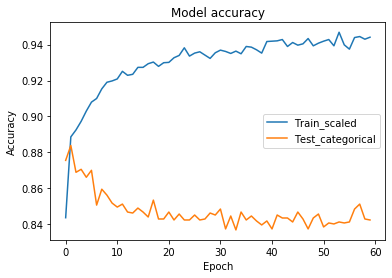

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_scaled', 'Test_categorical'], loc='best')
plt.show()

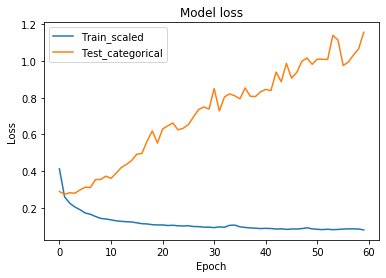

In [31]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train_scaled', 'Test_categorical'], loc='best') 
plt.show()